In [38]:
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
leerlauf = {'udia': [80, 160, 240, 320, 400], 'pl': [0.65, 1.05, 1.4, 1.822, 2.174]}
leerlauf_pd = pd.DataFrame(leerlauf)
y = leerlauf_pd.udia
x = leerlauf_pd.pl

x = np.array(x)

y = np.array(y)

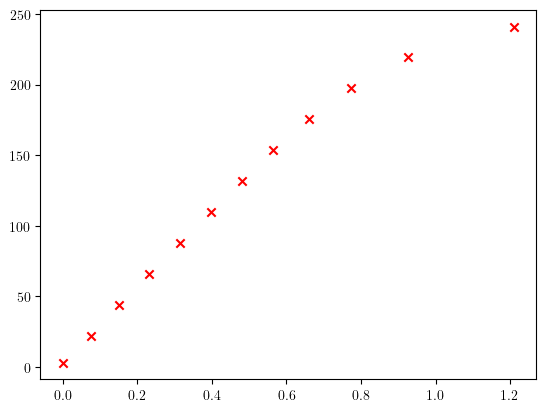

In [64]:
plt.scatter(x, y, marker='x', color='r', label='Messwerte')
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

[1.00e-03 7.50e-02 1.52e-01 2.32e-01 3.15e-01 3.98e-01 4.81e-01 5.65e-01
 6.60e-01 7.73e-01 9.25e-01 1.21e+00] [  2.9   22.04  43.82  65.72  87.51 109.5  131.7  153.6  175.3  197.4
 219.6  241.  ]
[-89.46292981  51.82295268 265.24971353   2.29224097]


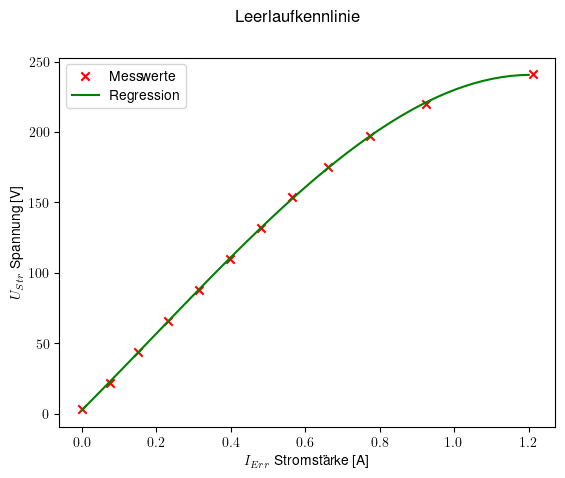

In [68]:
popt, pcov = curve_fit(func,  x,  y)
print(x, y)
print(popt)
x_lin_reg = np.linspace(0, 1.2)
fig = plt.figure()
plt.scatter(x, y, marker='x', color='r', label='Messwerte')
plt.plot(x_lin_reg, popt[0]*x_lin_reg**3+popt[1]*x_lin_reg**2+popt[2]*x_lin_reg+popt[3] , color='g', label='Regression')
fig.suptitle('Leerlaufkennlinie')
plt.xlabel('$I_{Err}$ Stromstärke [A]')
plt.ylabel('$U_{Str}$ Spannung [V]')
plt.legend(loc='best')

In [73]:
def predict(x):
    return popt[0]*x**3+popt[1]*x**2+popt[2]*x+popt[3]
print(predict(0.912))

219.4412570157895


In [75]:
kurzschluss = {'ik' : [0, 0.8, 1.6, 2.4, 3.2, 4, 4.8, 5.6, 6.4, 7.2, 8, 8.8], 'ierr': [0.049, 0.103, 0.214, 0.325, 0.436, 0.547, 0.658, 0.769, 0.88, 0.991, 1.102, 1.213]}
kurzschluss_pd = pd.DataFrame(kurzschluss)
y = kurzschluss_pd.ik
x = kurzschluss_pd.ierr


6.637622451810074


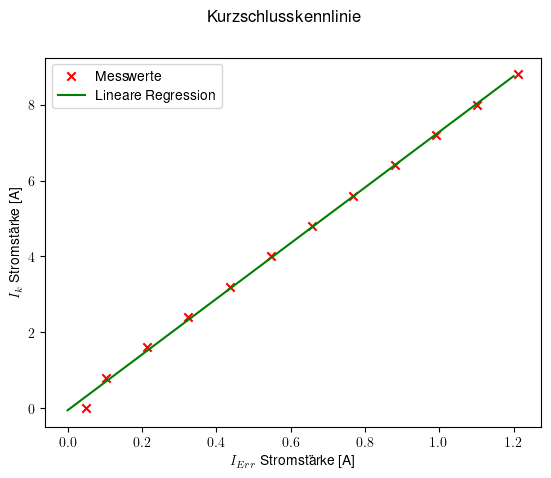

In [76]:

model = np.polyfit(x, y, 1)
x_lin_reg = np.linspace(0, 1.2)
predict = np.poly1d(model)
print(predict(0.912))
y_lin_reg = predict(x_lin_reg)
fig = plt.figure()
plt.scatter(x, y, marker='x', color='r', label='Messwerte')
plt.plot(x_lin_reg, y_lin_reg, color='g', label='Lineare Regression')
fig.suptitle('Kurzschlusskennlinie')
plt.xlabel('$I_{Err}$ Stromstärke [A]')
plt.ylabel('$I_{k}$ Stromstärke [A]')
plt.legend(loc='best')